In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
# sns.set(style="pastel") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore')
%matplotlib inline    
%config InlineBackend.figure_format = 'retina' 
from matplotlib import rcParams
config = {
    "font.family": 'serif', # 衬线字体
    "font.size": 7.5, # 相当于六号大小
    "font.serif": ['SimSun'], # 宋体
    "mathtext.fontset": 'stix', # matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)
from collections import OrderedDict
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline    
%config InlineBackend.figure_format = 'retina' 

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.rc("font", size=14)
import seaborn as sns
# sns.set(style="white") #white background style for seaborn plots
# sns.set(style="whitegrid", color_codes=True)
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']    # 指定默认字体：解决plot不能显示中文问题
mpl.rcParams['axes.unicode_minus'] = False           # 解决保存图像是负号'-'显示为方块的问题

import warnings
warnings.simplefilter(action='ignore') 

import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

C:\Users\12130\AppData\Roaming\Python\Python38\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [3]:
data=load_boston()

In [4]:
X=data["data"]
y=data["target"]
sc=StandardScaler()
X_sc=sc.fit_transform(X)
sc2=StandardScaler()
y_sc=sc2.fit_transform(y.reshape(-1,1))

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X_sc,y_sc)

In [6]:
featuresTrain=torch.from_numpy(X_train)
featuresTest=torch.from_numpy(X_test)
targetsTrain=torch.from_numpy(y_train)
targetsTest=torch.from_numpy(y_test)

In [7]:
# 基础参数
batch_size = 4
n_iters = 50000
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)

In [8]:
from torch.utils.data import DataLoader, TensorDataset
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)
train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

In [9]:
class house(nn.Module):
    def __init__(self):
        super(house, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(13, 10),  # 全连接层
            nn.ReLU(),  # relu**函数
            nn.Dropout(0.3),  # Dropout

            nn.Linear(10, 15),
            nn.ReLU(),

            nn.Linear(15, 1),
        )

    def forward(self, x):
        out = self.fc(x)
        return out

In [10]:
class house2(nn.Module):
    def __init__(self):
        super(house2, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(13, 10),  # 全连接层
            nn.ReLU(),  # relu**函数

            nn.Linear(10, 15),
            nn.ReLU(),

            nn.Linear(15, 1),
        )

    def forward(self, x):
        out = self.fc(x)
        return out

In [11]:
class house3(nn.Module):
    def __init__(self):
        super(house3, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(13, 10),  # 全连接层
            nn.ReLU(),  # relu**函数
            nn.Dropout(0.5),  # Dropout

            nn.Linear(10, 15),
            nn.ReLU(),

            nn.Linear(15, 1),
        )

    def forward(self, x):
        out = self.fc(x)
        return out

In [12]:
model=house()
error = nn.MSELoss()
learning_rate = 0.005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
dnn_loss_list = []
dnn_iteration_list = []
dnn_mse_list = []
count = 0
for epoch in range(num_epochs):
    for i, (X, y) in enumerate(train_loader):
        outputs = model(X.float())
        optimizer.zero_grad()
        loss = error(outputs.float(), y.float())
        loss.backward()
        optimizer.step()
        count+=1
        if count % 100 == 0:
            dnn_loss_list.append(loss.data.item())
            dnn_iteration_list.append(count)
            print('Iteration: {}. Loss: {}.'.format(count, loss.data.item()))      

Iteration: 100. Loss: 0.2760356068611145.
Iteration: 200. Loss: 0.6426998376846313.
Iteration: 300. Loss: 0.4275001585483551.
Iteration: 400. Loss: 0.4964948892593384.
Iteration: 500. Loss: 0.08624697476625443.
Iteration: 600. Loss: 0.08981899917125702.
Iteration: 700. Loss: 0.04939527064561844.
Iteration: 800. Loss: 0.19298295676708221.
Iteration: 900. Loss: 0.04946580529212952.
Iteration: 1000. Loss: 1.036505937576294.
Iteration: 1100. Loss: 0.3873053789138794.
Iteration: 1200. Loss: 0.21595138311386108.
Iteration: 1300. Loss: 0.03051953762769699.
Iteration: 1400. Loss: 0.06399967521429062.
Iteration: 1500. Loss: 0.594118058681488.
Iteration: 1600. Loss: 0.06117654964327812.
Iteration: 1700. Loss: 0.21348826587200165.
Iteration: 1800. Loss: 0.027959980070590973.
Iteration: 1900. Loss: 0.07562275975942612.
Iteration: 2000. Loss: 0.5492606163024902.
Iteration: 2100. Loss: 0.16310273110866547.
Iteration: 2200. Loss: 0.09267584979534149.
Iteration: 2300. Loss: 0.08412202447652817.
Iterat

Iteration: 18700. Loss: 0.11482201516628265.
Iteration: 18800. Loss: 0.07538105547428131.
Iteration: 18900. Loss: 0.04363103210926056.
Iteration: 19000. Loss: 0.12084252387285233.
Iteration: 19100. Loss: 0.10069266706705093.
Iteration: 19200. Loss: 0.2510021924972534.
Iteration: 19300. Loss: 0.1159198135137558.
Iteration: 19400. Loss: 0.12419410049915314.
Iteration: 19500. Loss: 0.006935124285519123.
Iteration: 19600. Loss: 0.16975829005241394.
Iteration: 19700. Loss: 0.08699207752943039.
Iteration: 19800. Loss: 0.05470641329884529.
Iteration: 19900. Loss: 0.021732676774263382.
Iteration: 20000. Loss: 0.0712829977273941.
Iteration: 20100. Loss: 0.2160988748073578.
Iteration: 20200. Loss: 0.1675611138343811.
Iteration: 20300. Loss: 0.04689345508813858.
Iteration: 20400. Loss: 0.06509646773338318.
Iteration: 20500. Loss: 0.4675651788711548.
Iteration: 20600. Loss: 0.11010970920324326.
Iteration: 20700. Loss: 0.04267239570617676.
Iteration: 20800. Loss: 0.024337314069271088.
Iteration: 20

Iteration: 37000. Loss: 0.08382867276668549.
Iteration: 37100. Loss: 0.08453091979026794.
Iteration: 37200. Loss: 0.12253674119710922.
Iteration: 37300. Loss: 0.15036508440971375.
Iteration: 37400. Loss: 0.00691707618534565.
Iteration: 37500. Loss: 0.08404688537120819.
Iteration: 37600. Loss: 0.7622343301773071.
Iteration: 37700. Loss: 0.1422804445028305.
Iteration: 37800. Loss: 0.13725480437278748.
Iteration: 37900. Loss: 0.08231007307767868.
Iteration: 38000. Loss: 0.13087056577205658.
Iteration: 38100. Loss: 0.574114978313446.
Iteration: 38200. Loss: 0.21431255340576172.
Iteration: 38300. Loss: 0.18163155019283295.
Iteration: 38400. Loss: 0.006884461268782616.
Iteration: 38500. Loss: 0.01463327370584011.
Iteration: 38600. Loss: 0.17613595724105835.
Iteration: 38700. Loss: 0.03798601031303406.
Iteration: 38800. Loss: 0.040832191705703735.
Iteration: 38900. Loss: 0.035675667226314545.
Iteration: 39000. Loss: 0.033140093088150024.
Iteration: 39100. Loss: 0.13850218057632446.
Iteration:

In [13]:
a=np.array(dnn_loss_list)

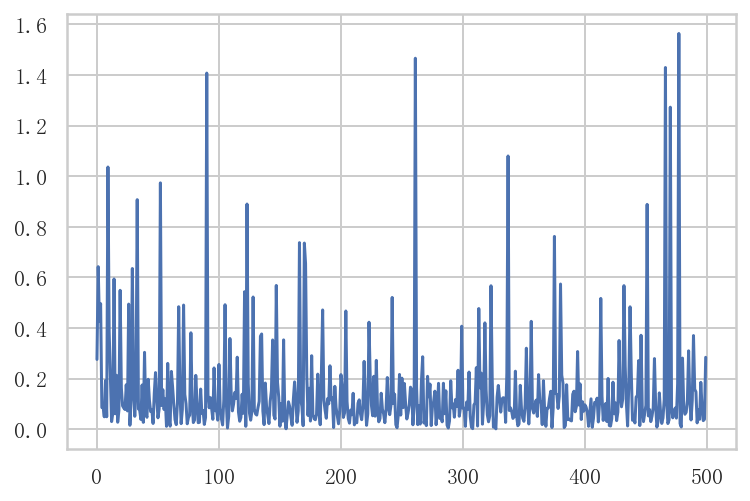

In [14]:
plt.plot(a)

In [15]:
y_hat_list = []
for X, y in test_loader:
    outputs = model(X.float())
    y_hat_list.append(outputs)

In [16]:
y_hat_list

[tensor([[ 0.1964],
         [-1.4705],
         [ 0.0247],
         [ 2.2487]], grad_fn=<AddmmBackward0>),
 tensor([[-0.4735],
         [-0.2486],
         [-0.7039],
         [ 0.5837]], grad_fn=<AddmmBackward0>),
 tensor([[-0.2895],
         [-0.3786],
         [-0.3848],
         [ 0.0504]], grad_fn=<AddmmBackward0>),
 tensor([[ 0.5884],
         [ 0.1578],
         [-0.3101],
         [-0.2622]], grad_fn=<AddmmBackward0>),
 tensor([[-0.2150],
         [ 0.1179],
         [-0.3703],
         [-0.0723]], grad_fn=<AddmmBackward0>),
 tensor([[ 0.3925],
         [-0.1486],
         [ 0.5657],
         [-0.2316]], grad_fn=<AddmmBackward0>),
 tensor([[-0.8413],
         [ 0.7623],
         [-0.6281],
         [ 0.1328]], grad_fn=<AddmmBackward0>),
 tensor([[-0.3772],
         [-0.5039],
         [ 2.2415],
         [ 0.4239]], grad_fn=<AddmmBackward0>),
 tensor([[-0.3247],
         [-1.0956],
         [-0.4845],
         [-0.6425]], grad_fn=<AddmmBackward0>),
 tensor([[-0.7234],
        

In [17]:
array=np.array([])
for i in y_hat_list:
    a=(np.array(i.flatten().detach()))
#     print(a)
    array=np.hstack([array,a])

In [18]:
test_pre_inv=sc2.inverse_transform(array.reshape(-1,1))

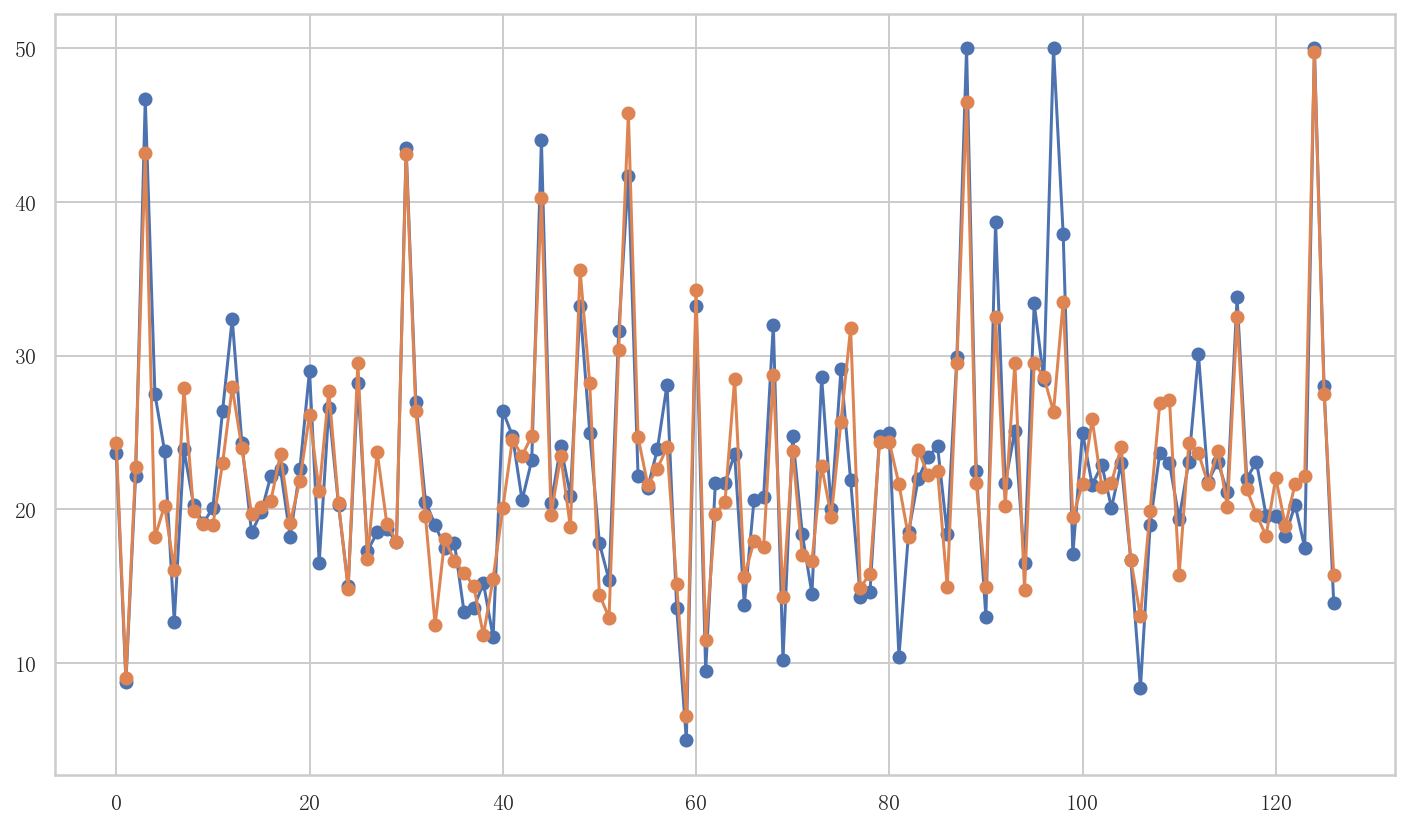

In [19]:
y_true=sc2.inverse_transform(y_test).flatten()
plt.figure(figsize=(12,7))
plt.plot(y_true,marker="o")
plt.plot(test_pre_inv,marker="o")

In [20]:
y_true

array([23.7,  8.8, 22.2, 46.7, 27.5, 23.8, 12.7, 23.9, 20.3, 19.1, 20.1,
       26.4, 32.4, 24.3, 18.5, 19.8, 22.2, 22.6, 18.2, 22.6, 29. , 16.5,
       26.6, 20.3, 15. , 28.2, 17.3, 18.5, 18.7, 17.9, 43.5, 27. , 20.5,
       19. , 17.5, 17.8, 13.3, 13.6, 15.2, 11.7, 26.4, 24.8, 20.6, 23.2,
       44. , 20.4, 24.1, 20.9, 33.2, 25. , 17.8, 15.4, 31.6, 41.7, 22.2,
       21.4, 23.9, 28.1, 13.6,  5. , 33.2,  9.5, 21.7, 21.7, 23.6, 13.8,
       20.6, 20.8, 32. , 10.2, 24.8, 18.4, 14.5, 28.6, 20. , 29.1, 21.9,
       14.3, 14.6, 24.8, 25. , 10.4, 18.5, 22. , 23.4, 24.1, 18.4, 29.9,
       50. , 22.5, 13. , 38.7, 21.7, 25.1, 16.5, 33.4, 28.4, 50. , 37.9,
       17.1, 25. , 21.6, 22.9, 20.1, 23. , 16.7,  8.4, 19. , 23.7, 23. ,
       19.4, 23.1, 30.1, 21.8, 23.1, 21.1, 33.8, 22. , 23.1, 19.6, 19.6,
       18.3, 20.3, 17.5, 50. , 28. , 13.9])

In [21]:
model=house2()
error = nn.MSELoss()
learning_rate = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
dnn_loss_list = []
dnn_iteration_list = []
dnn_mse_list = []
count = 0
for epoch in range(num_epochs):
    for i, (X, y) in enumerate(train_loader):
        outputs = model(X.float())
        optimizer.zero_grad()
        loss = error(outputs.float(), y.float())
        loss.backward()
        optimizer.step()
        count+=1
        if count % 100 == 0:
            dnn_loss_list.append(loss.data.item())
            dnn_iteration_list.append(count)
            print('Iteration: {}. Loss: {}.'.format(count, loss.data.item()))    

Iteration: 100. Loss: 1.3008995056152344.
Iteration: 200. Loss: 0.21093544363975525.
Iteration: 300. Loss: 1.7290083169937134.
Iteration: 400. Loss: 1.3305377960205078.
Iteration: 500. Loss: 0.16898949444293976.
Iteration: 600. Loss: 0.1730329394340515.
Iteration: 700. Loss: 0.14573435485363007.
Iteration: 800. Loss: 0.1939431130886078.
Iteration: 900. Loss: 0.04020960256457329.
Iteration: 1000. Loss: 0.2058713287115097.
Iteration: 1100. Loss: 0.007331174798309803.
Iteration: 1200. Loss: 0.06828393042087555.
Iteration: 1300. Loss: 0.03285074234008789.
Iteration: 1400. Loss: 0.12587623298168182.
Iteration: 1500. Loss: 0.7511812448501587.
Iteration: 1600. Loss: 0.10725605487823486.
Iteration: 1700. Loss: 0.30424514412879944.
Iteration: 1800. Loss: 0.06867608428001404.
Iteration: 1900. Loss: 0.3476601839065552.
Iteration: 2000. Loss: 0.06442898511886597.
Iteration: 2100. Loss: 0.17378944158554077.
Iteration: 2200. Loss: 0.06406185775995255.
Iteration: 2300. Loss: 0.028935372829437256.
Ite

Iteration: 18700. Loss: 0.06013662740588188.
Iteration: 18800. Loss: 0.08035783469676971.
Iteration: 18900. Loss: 0.033414795994758606.
Iteration: 19000. Loss: 0.0027863606810569763.
Iteration: 19100. Loss: 0.08017118275165558.
Iteration: 19200. Loss: 0.06317517161369324.
Iteration: 19300. Loss: 0.024488337337970734.
Iteration: 19400. Loss: 0.026443593204021454.
Iteration: 19500. Loss: 0.023376446217298508.
Iteration: 19600. Loss: 0.07988908141851425.
Iteration: 19700. Loss: 0.028499357402324677.
Iteration: 19800. Loss: 0.05038389936089516.
Iteration: 19900. Loss: 0.03743338584899902.
Iteration: 20000. Loss: 0.010235128924250603.
Iteration: 20100. Loss: 0.01776464283466339.
Iteration: 20200. Loss: 0.02175813540816307.
Iteration: 20300. Loss: 0.008977429941296577.
Iteration: 20400. Loss: 0.05479062721133232.
Iteration: 20500. Loss: 0.1845737099647522.
Iteration: 20600. Loss: 0.05647802725434303.
Iteration: 20700. Loss: 0.08119021356105804.
Iteration: 20800. Loss: 0.029513044282794.
Iter

Iteration: 37100. Loss: 0.013838604092597961.
Iteration: 37200. Loss: 0.0061004022136330605.
Iteration: 37300. Loss: 0.02330585941672325.
Iteration: 37400. Loss: 0.019382294267416.
Iteration: 37500. Loss: 0.0523507222533226.
Iteration: 37600. Loss: 0.14914201200008392.
Iteration: 37700. Loss: 0.03921952098608017.
Iteration: 37800. Loss: 0.07949811965227127.
Iteration: 37900. Loss: 0.01707449182868004.
Iteration: 38000. Loss: 0.003011941909790039.
Iteration: 38100. Loss: 0.033160772174596786.
Iteration: 38200. Loss: 0.04701387882232666.
Iteration: 38300. Loss: 0.01519918441772461.
Iteration: 38400. Loss: 0.020469237118959427.
Iteration: 38500. Loss: 0.017689593136310577.
Iteration: 38600. Loss: 0.038770854473114014.
Iteration: 38700. Loss: 0.03343269228935242.
Iteration: 38800. Loss: 0.024692900478839874.
Iteration: 38900. Loss: 0.015039961785078049.
Iteration: 39000. Loss: 0.013277905061841011.
Iteration: 39100. Loss: 0.0055689034052193165.
Iteration: 39200. Loss: 0.02196320705115795.


In [22]:
a2=np.array(dnn_loss_list)

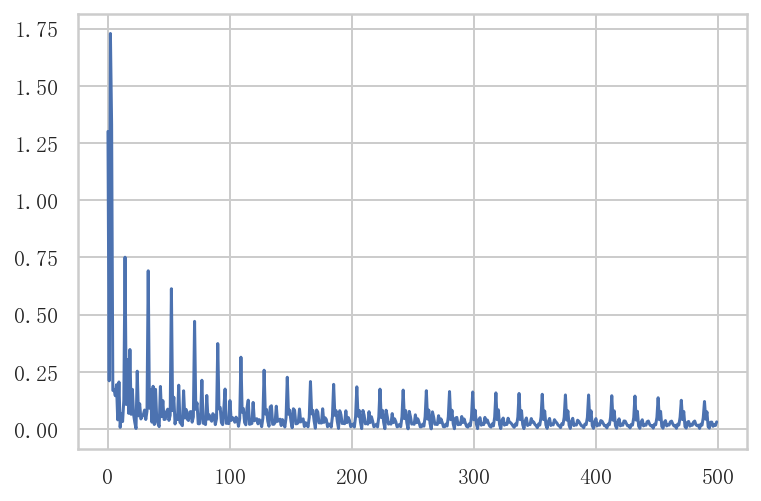

In [23]:
plt.plot(a2)

In [24]:
y_hat_list2 = []
for X, y in test_loader:
    outputs = model(X.float())
    y_hat_list2.append(outputs)

In [25]:
array2=np.array([])
for i in y_hat_list2:
    a=(np.array(i.flatten().detach()))
#     print(a)
    array2=np.hstack([array2,a])

In [26]:
test_pre_inv2=sc2.inverse_transform(array2.reshape(-1,1))

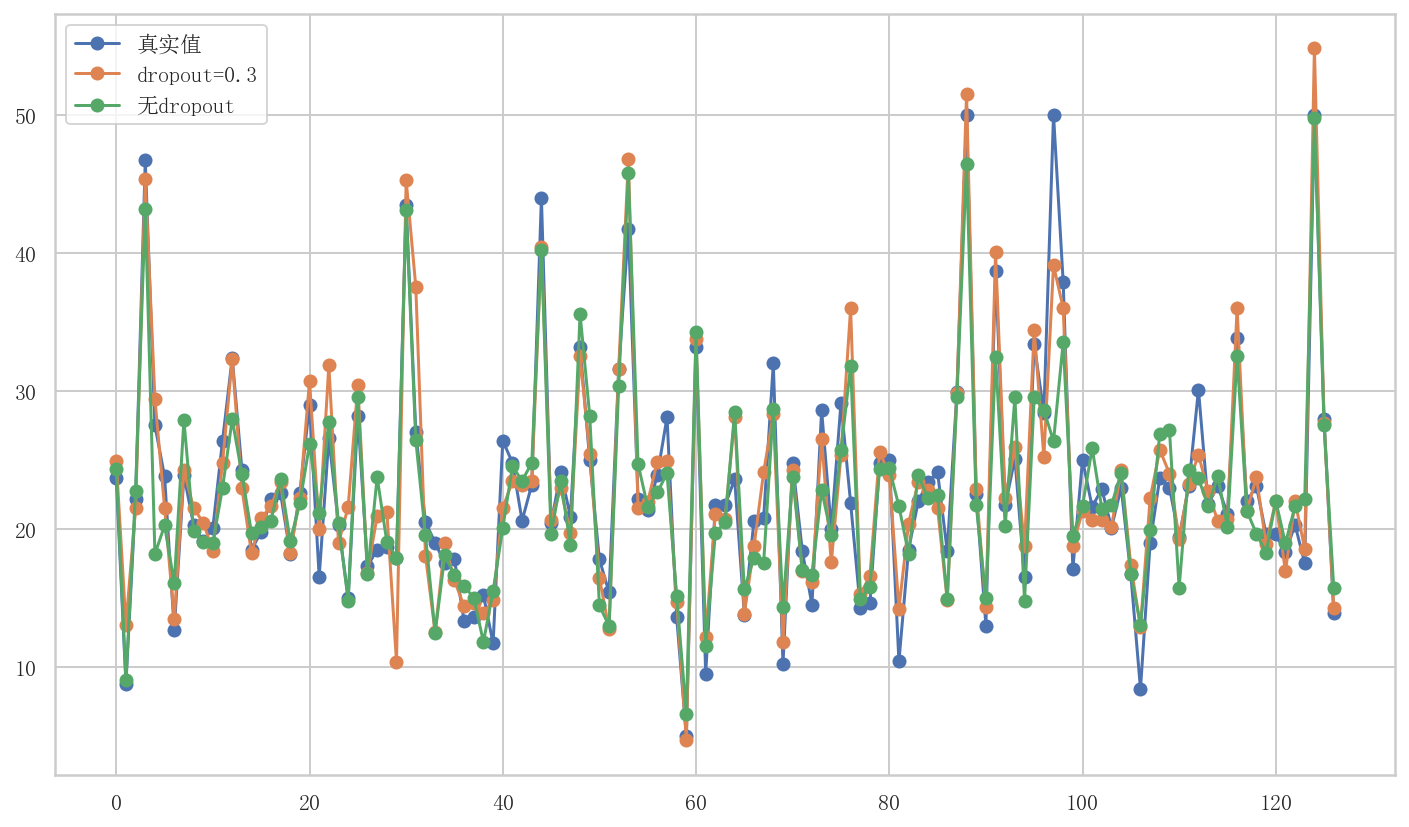

In [35]:
y_true=sc2.inverse_transform(y_test).flatten()
plt.figure(figsize=(12,7))
plt.plot(y_true,marker="o",label="真实值")
plt.plot(test_pre_inv2,marker="o",label="dropout=0.3")
plt.plot(test_pre_inv,marker="o",label="无dropout")
plt.legend()

In [28]:
from sklearn.metrics import *

In [29]:
r2_score(y_true,test_pre_inv)

0.7999765910352516

In [30]:
r2_score(y_true,test_pre_inv2)

0.8731101141799156

In [31]:
mean_absolute_error(y_true,test_pre_inv)

2.4313443822506344

In [32]:
mean_absolute_error(y_true,test_pre_inv2)

2.016668987788336

In [33]:
mean_absolute_percentage_error(y_true,test_pre_inv)

0.11667089904354154

In [34]:
mean_absolute_percentage_error(y_true,test_pre_inv2)

0.09833579926068794